# SEaM data plotter

Plots the data from a SEaM spreadsheet as a series of bar charts. Change the filename in the marked cell to input from a new spreadsheet, then run all.

AFAIK, the data is in a standard format.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

First, let's get a SEaM data file.

In [24]:
# Change this line to read the seam file

feedback_df=pd.read_excel('SEaM\ Open\ Comments\ for\ TM351-2016J\ Faculty\ of\ Science\ Technology\ Engineering\ and\ Mathematics\ .xlsx', sheet_name=2)

FileNotFoundError: [Errno 2] No such file or directory: 'SEaM\\ Open\\ Comments\\ for\\ TM351-2016J\\ Faculty\\ of\\ Science\\ Technology\\ Engineering\\ and\\ Mathematics\\ .xlsx'

In [25]:
# Change this line to read the seam file

feedback_df=pd.read_excel('/Users/alistair.willis/OneDrive - The Open University/teaching/TM351/2017J/SEaM Open Comments for TM351-2017J Faculty of Science Technology Engineering and Mathematics .xlsx', sheet_name=2)

In [3]:
# Change this line to read the seam file

feedback_df=pd.read_excel('test.xlsx', sheet_name=2)

In [3]:
# Change this line to read the seam file

feedback_df=pd.read_excel('test.xlsx', sheet_name=2)

In [3]:
# Change this line to read the seam file

feedback_df=pd.read_excel('test.xlsx', sheet_name=2)

In [3]:
# Change this line to read the seam file

feedback_df=pd.read_excel('test.xlsx', sheet_name=2)

Check the contents of the dataframe:

In [26]:
feedback_df.head()

,coursepres,q1:The way the module materials were presented helped to maintain my interest.,q2:The study workload on this module fitted with my personal circumstances.,q3:The structure of the module meant I could interact with my peers when learning.,q4:Resources I accessed through the Library (e.g. journal articles) helped me to understand the core concepts of the module.,q5:I was satisfied with the opportunities I had to attend tutorials (either face to face or online).,"q6:Sufficient opportunities were provided to check my understanding on the module, for example by completing iCMAs or TMAs.",q7:The instructions on how to complete the assessed tasks were easy to follow.,q8:It was obvious how the module materials related to the assessed tasks on this module.,q9:There was enough time in the study planner to prepare for the end of module assessment.,...,q17:My tutors feedback on assessed tasks helped me to learn.,q18:My tutor supported me in developing professional or work-related skills.,q19:I have received sufficient advice and guidance in relation to my module.,q20:I have a clear idea about my next module choice.,q21:I was satisfied with the quality of the module.,q22:I would recommend OU study to other students.,q23:My studies have helped me develop my self-confidence.,"If you answered Disagree to any of the statements above, we would like to understand why so we can make improvements in the future","Do you have any further comments about your teaching, assessment and learning on this module?",Do you have any other comments to add about your study experience on this module?
0,TM351-2017J,2. Mostly agree,2. Mostly agree,5. Definitely disagree,1. Definitely agree,1. Definitely agree,2. Mostly agree,2. Mostly agree,1. Definitely agree,5. Definitely disagree,...,1. Definitely agree,3. Neither agree nor disagree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,"Two weeks at the end of the course, was not sufficient to complete the EMA, more time is required.",The first four notebooks need to be released before the course commences. The course is not a programming course but without a strong understanding of the various programming languages you cannot move on and complete tasks and fully understand course content.,NaN
1,TM351-2017J,1. Definitely agree,2. Mostly agree,2. Mostly agree,3. Neither agree nor disagree,2. Mostly agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,2. Mostly agree,...,2. Mostly agree,2. Mostly agree,1. Definitely agree,6. Not applicable/used,1. Definitely agree,2. Mostly agree,3. Neither agree nor disagree,NaN,NaN,NaN
2,TM351-2017J,2. Mostly agree,2. Mostly agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,2. Mostly agree,2. Mostly agree,...,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,I did not enter disagree in any of the boxes but should point that as this is a Computing module that it would not be difficult to recognise whether the user selected disagree and then only show this box if they had. Thanks,All tutors seemed enthusiastic and engaged with the material,"I understand that in previous presentations , this was a module where the workload was considered enormous. I found that while there was a lot to do it was obvious that many improvements had been made and streamlining opportunities had been taken. This meant that the fears I had going into this module did not come to pass. I definitely enjoyed the module. One major drawback however was that in order to run the software I had to purchase a new laptop. With the increasing fees this was a commitment that I could ill afford."
3,TM351-2017J,2. Mostly agree,2. Mostly agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,1. Definitely agree,2. Mostly agree,1. Definitely agree,2. Mostly agree,...,1. Definitely agree,1. Definitely agree,1. Definit

Now, let's whittle down to the columns we actually want:

In [27]:
feedback_df=(feedback_df
 
 .rename({'If you answered Disagree to any of the statements above, we would like to understand why so we can make improvements in the future':'improvements',
          'Do you have any further comments about your teaching, assessment and learning on this module?':'teaching_assessment_learning',
          'Do you have any other comments to add about your study experience on this module?':'study_experience'},
         axis='columns')

    .filter(['improvements', 'teaching_assessment_learning', 'study_experience'], axis='columns')

    .dropna(axis='rows', how='all')
)

In [28]:
feedback_df.head()

,improvements,teaching_assessment_learning,study_experience
0,"Two weeks at the end of the course, was not sufficient to complete the EMA, more time is required.",The first four notebooks need to be released before the course commences. The course is not a programming course but without a strong understanding of the various programming languages you cannot move on and complete tasks and fully understand course content.,NaN
2,I did not enter disagree in any of the boxes but should point that as this is a Computing module that it would not be difficult to recognise whether the user selected disagree and then only show this box if they had. Thanks,All tutors seemed enthusiastic and engaged with the material,"I understand that in previous presentations , this was a module where the workload was considered enormous. I found that while there was a lot to do it was obvious that many improvements had been made and streamlining opportunities had been taken. This meant that the fears I had going into this module did not come to pass. I definitely enjoyed the module. One major drawback however was that in order to run the software I had to purchase a new laptop. With the increasing fees this was a commitment that I could ill afford."
4,"Very much enjoyed the module, and what I have learned has already come in very handy at work. While it doesnt turn me into a database admin or designer all of a sudden, it allows me to interact with the relevant IT people at my job in a more effective manner due to my greater understanding of the correct terms and procedures, and how it all works. It has given me a greater appreciation of what can or cannot be achieved.The workload was fitting for the 30 credit points, and the icmas gave lots of opportunity to practise and check my knowledge as I went on. All in all a very valuable module, definitely worth the time and money spent.",NaN,NaN
6,"There was a section of the materials which, although assessed, could be completely disregarded if the correct strategic decisions about which assessments to take were made - i.e. if 5 iCMAs were already passed, the final iCMA could be ignored, thus removing the assessment of the last few units altogether. This seems odd to me, unless you were aiming to teach such strategies, in which case, perhaps something a bit more explicit? Unless that would negate the lesson?","A well presented module. Good fun, lots to learn, but the structure was quite free-flowing, so allowed for flexibility in time management. Some students seemed to experience issues getting the module software (sensibly packaged as a virtual machine) running, but the forums were good for assistance here, and I had no issues.Lots of interesting data analysis techniques to learn, but none appeared truly essential to passing. This allowed me to focus on the context for such tools, and the overarching reasons for the analyses.",NaN
9,"It should have been made clearer, that the python notebook where a reference and we did not have to work through every single notebook in great detail.The notebooks were very good, and I will be keeping them for future reference.",NaN,NaN


In [29]:
from nltk.tokenize import sent_tokenize


OK, let's see if we can put all the sentences into a single DataFrame. Reasonably tidily.

In [30]:
l=[]

ss=(feedback_df['improvements']
 
     .dropna()
)

for idx in ss.index:
    l.extend([{'response':idx, 'sentence_num':i, 'improvements':s} for (i, s)
              in enumerate(sent_tokenize(ss[idx]))])

df1=pd.DataFrame(l)
df1.head()

,response,sentence_num,improvements
0,0,0,"Two weeks at the end of the course, was not sufficient to complete the EMA, more time is required."
1,2,0,I did not enter disagree in any of the boxes but should point that as this is a Computing module that it would not be difficult to recognise whether the user selected disagree and then only show this box if they had.
2,2,1,Thanks
3,4,0,"Very much enjoyed the module, and what I have learned has already come in very handy at work."
4,4,1,"While it doesnt turn me into a database admin or designer all of a sudden, it allows me to interact with the relevant IT people at my job in a more effective manner due to my greater understanding of the correct terms and procedures, and how it all works."


In [31]:
l=[]

ss=(feedback_df['teaching_assessment_learning']
 
     .dropna()
)

for idx in ss.index:
    l.extend([{'response':idx, 'sentence_num':i, 'teaching_assessment_learning':s} for (i, s)
              in enumerate(sent_tokenize(ss[idx]))])

df2=pd.DataFrame(l)
df2.head()

,response,sentence_num,teaching_assessment_learning
0,0,0,The first four notebooks need to be released before the course commences.
1,0,1,The course is not a programming course but without a strong understanding of the various programming languages you cannot move on and complete tasks and fully understand course content.
2,2,0,All tutors seemed enthusiastic and engaged with the material
3,6,0,A well presented module.
4,6,1,"Good fun, lots to learn, but the structure was quite free-flowing, so allowed for flexibility in time management."


In [32]:
l=[]

ss=(feedback_df['study_experience']
 
     .dropna()
)

for idx in ss.index:
    l.extend([{'response':idx, 'sentence_num':i, 'study_experience':s} for (i, s)
              in enumerate(sent_tokenize(ss[idx]))])

df3=pd.DataFrame(l)
df3.head()

,response,sentence_num,study_experience
0,2,0,"I understand that in previous presentations , this was a module where the workload was considered enormous."
1,2,1,I found that while there was a lot to do it was obvious that many improvements had been made and streamlining opportunities had been taken.
2,2,2,This meant that the fears I had going into this module did not come to pass.
3,2,3,I definitely enjoyed the module.
4,2,4,One major drawback however was that in order to run the software I had to purchase a new laptop.


In [33]:
all_comments_df=(pd
                 
                 .merge(df1, df2, how='outer')
                 
                 .merge(df3, how='outer')
                )

all_comments_df.head()

,response,sentence_num,improvements,teaching_assessment_learning,study_experience
0,0,0,"Two weeks at the end of the course, was not sufficient to complete the EMA, more time is required.",The first four notebooks need to be released before the course commences.,NaN
1,2,0,I did not enter disagree in any of the boxes but should point that as this is a Computing module that it would not be difficult to recognise whether the user selected disagree and then only show this box if they had.,All tutors seemed enthusiastic and engaged with the material,"I understand that in previous presentations , this was a module where the workload was considered enormous."
2,2,1,Thanks,NaN,I found that while there was a lot to do it was obvious that many improvements had been made and streamlining opportunities had been taken.
3,4,0,"Very much enjoyed the module, and what I have learned has already come in very handy at work.",NaN,NaN
4,4,1,"While it doesnt turn me into a database admin or designer all of a sudden, it allows me to interact with the relevant IT people at my job in a more effective manner due to my greater understanding of the correct terms and procedures, and how it all works.",NaN,NaN


In [34]:
all_comments_df=(all_comments_df
 
                 .sort_values(['response', 'sentence_num'])
 
                 .set_index(['response', 'sentence_num'])
)

all_comments_df

improvements  \
response sentence_num                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0        0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Two weeks at the end of the course, was not sufficient to complete the EMA, more time is required.   
         1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         NaN   
2        0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    I did not enter disagree in any of the boxes but should point that as this is a Computing module that it would not be difficult to recognise whether the user selected disagree and then only show this box if they had.   
         1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Thanks   
         2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [35]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [36]:
sns.diverging_palette(10, 125, s=75, l=50,
                                  n=16, center="light")

[(0.8545371341681446, 0.22957019267094914, 0.2762321841840895),
 (0.8673249565811431, 0.324891188721002, 0.36532329669250857),
 (0.8801127789941414, 0.4202121847710548, 0.45441440920092774),
 (0.8929006014071399, 0.5155331808211077, 0.5435055217093469),
 (0.906063067054894, 0.6136467841773143, 0.635206725404536),
 (0.9188508894678925, 0.7089677802273672, 0.7242978379129551),
 (0.9316387118808909, 0.80428877627742, 0.8133889504213743),
 (0.9444265342938893, 0.8996097723274729, 0.9024800629297933),
 (0.886753429692115, 0.9252930344770272, 0.8825422791235433),
 (0.7974936879014439, 0.868249489534432, 0.788438813627399),
 (0.708233946110773, 0.8112059445918369, 0.6943353481312547),
 (0.6189742043201019, 0.7541623996492418, 0.6002318826351104),
 (0.5270994310316574, 0.6954476571009066, 0.5033714796732588),
 (0.4378396892409864, 0.6384041121583116, 0.4092680141771145),
 (0.3485799474503153, 0.5813605672157163, 0.3151645486809701),
 (0.25932020565964425, 0.5243170222731213, 0.22106108318482592)]

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [39]:
sia = SentimentIntensityAnalyzer()

In [40]:
def polarity_scores_check(txt):
    try:
        return sia.polarity_scores(txt)['compound']
    except:
        return 0

all_comments_df.applymap(polarity_scores_check)

improvements  teaching_assessment_learning  \
response sentence_num                                               
0        0                   0.0000                        0.0000   
         1                   0.0000                       -0.5504   
2        0                   0.7213                        0.7096   
         1                   0.4404                        0.0000   
         2                   0.0000                        0.0000   
         3                   0.0000                        0.0000   
         4                   0.0000                        0.0000   
         5                   0.0000                        0.0000   
4        0                   0.5542                        0.0000   
         1                   0.7089                        0.0000   
         2                   0.8807                        0.0000   
         3                   0.8051                        0.0000   
6        0                  -0.4391                        0.2732   
         1                  -0.3182                        0.7647   
         2                  -0.3182                        0.3593   
         3                   0.0000                        0.0000   
9        0                   0.8070                        0.0000   
11       0                   0.7650                        0.0000   
         1                  -0.0516                        0.0000   
12       0                   0.0000                       -0.5994   
         1                   0.4678                        0.0000   
         2                   0.0000                        0.0516   
         3                   0.0000                       -0.0772   
         4                   0.0000                       -0.5331   
14       0                   0.8070                        0.0000   
         1                   0.4754                        0.0000   
         2                   0.0000                        0.0000   
         3                   0.4186                        0.0000   
16       0                   0.4522                        0.4522   
         1                   0.0000                        0.0000   
         2                   0.0000                        0.0000   
         3                   0.0000                        0.0000   
17       0                   0.7096                        0.0000   
18       0                   0.2810                       -0.1779   
         1                  -0.7351                        0.0000   
         2                  -0.3089                        0.0000   
         3                   0.9408                        0.0000   
19       0                   0.0000                        0.0000   
         1                   0.0000                        0.4576   
         2                   0.3818                        0.6310   
         3                   0.0000                        0.0000   
         4                   0.0000                        0.0000   
         5                   0.2095                        0.0000   
21       0                   0.8360                        0.0000   
24       0                  -0.6652                        0.4404   
         1                   0.6124                        0.4404   
         2                   0.0000                        0.4404   
25       0                  -0.8192                        0.4588   
         1                  -0.7717                        0.5574   
26       0                   0.1787                       -0.3612   
         1                   0.7579                       -0.6428   
         2                   0.0000                       -0.3612   
         3                  -0.4201                        0.7227   
         4                   0.0000                        0.7469   
         5                   0.0000                        0.0000   
29       0                   0.0000                        0.4215   
         1           

OK, that seems to be more or less working. So now let's see whether we can colour the cells...

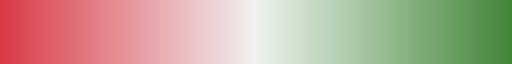

In [41]:
sentiment_colour_map=sns.diverging_palette(10, 125, s=75, l=50,
                                           n=8, center="light", as_cmap=True)
sentiment_colour_map

In [42]:
all_comments_df.style.background_gradient(cmap=sentiment_colour_map,
                                         axis=None, vmin=-1, vmax=1,
                                          gmap=all_comments_df.applymap(polarity_scores_check))